In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
##############################################################
# Calculate left-right hand EDA differences after the baseline period
##############################################################

import glob
import csv
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

meanDiffs = []
# Load EDA baseline epochs for each subject 
# Structure of EDA baseline epochs file: 
# Subject ID | Baseline epoch start (system) time | Baseline epoch end (system) time 
baselines = np.loadtxt('./../Experiment/EDA/BaselineEDA.csv', delimiter=",", skiprows=1, dtype=str)
baseline_epochs = dict(zip(baselines[:, 0], baselines[:, 1:]))
# print "Baselines: \n", baseline_epochs

handedness_data = np.loadtxt('./../Experiment/handedness.csv', delimiter=",", skiprows=1, dtype=str)
    
print "SID | mean skin conductance difference | handedness"
# Iterate over subjects
for i,row in enumerate(baselines):
    SID = row[0]

    # Load EDA files (fields are strings)
    all_L_data = np.loadtxt('./../Experiment/EDA/S' + SID + '_L.csv', delimiter=",", skiprows=8, dtype=str)
    all_R_data = np.loadtxt('./../Experiment/EDA/S' + SID + '_R.csv', delimiter=",", skiprows=8, dtype=str)
    # EDA values are no longer strings, but times are
    L_times = all_L_data[:,0]
    L_EDA = all_L_data[:,6].astype(np.float32)
    R_times = all_R_data[:,0]
    R_EDA = all_R_data[:,6].astype(np.float32)
    
    # Calculate EDA means after skipping baseline period
    meanL = np.mean([EDA for t,EDA in zip(L_times,L_EDA) if t > baseline_epochs[SID][1] ])
    meanR = np.mean([EDA for t,EDA in zip(R_times,R_EDA) if t > baseline_epochs[SID][1] ])
    meanDiffs.append(meanL - meanR)
    print SID, ":", meanDiffs[-1], "\t\t", handedness_data[i][1]
    


SID | mean skin conductance difference | handedness
01 : 0.524951 		R
02 : 0.85291 		R
03 : -0.0742603 		R
04 : 1.0736 		R
05 : 0.171726 		R
06 : 0.177441 		R
07 : 0.116526 		R
08 : -0.0735941 		R
09 : -0.0202157 		L
10 : 0.0878184 		R
11 : 0.187202 		L
12 : 0.909572 		R
13 : 0.230312 		R
14 : -1.29338 		R
15 : 0.886739 		R
16 : 0.0195867 		R
17 : 0.677766 		R
18 : 0.139503 		R
19 : 2.08436 		R
20 : 3.38126 		L


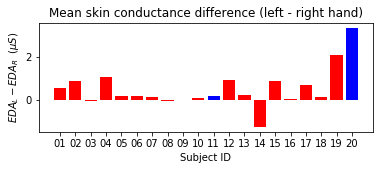

Left-handed: blue, Right-handed: red


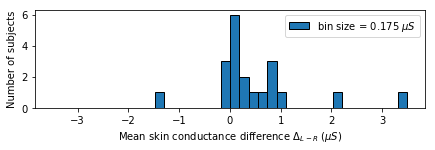

In [2]:
# PLOTTING

color_by_handedness = [ 'blue' if row[1] == 'L' else 'red' for row in handedness_data]
plt.figure(figsize=(6,2))
x = range(1,1+len(meanDiffs))
plt.bar(x, meanDiffs, width=0.8, align='center', color=color_by_handedness)
plt.xticks(x, baselines[:, 0])
plt.xlabel('Subject ID')
plt.ylabel('$EDA_L - EDA_R$  $(\mu S)$')
plt.title('Mean skin conductance difference (left - right hand)')
# plt.legend()
plt.show()
print "Left-handed: blue, Right-handed: red"

plt.figure(figsize=(7,1.8))
N = 20 #20,15,10,5 ---------------- set granularity
step = 3.5/N
bins = np.unique(np.concatenate((np.linspace(-3.5,0.,N), np.linspace(0.,3.5,N)), axis=0))
plt.hist(meanDiffs, bins=bins, edgecolor='black', label='bin size = '+str(3.5/N)+' $\mu S$')#, width=1.1*step)
# plt.xlabel('$EDA_L - EDA_R$  $(\mu S)$')
plt.xlabel('Mean skin conductance difference $\Delta_{L-R}$ $(\mu S)$')
plt.ylabel('Number of subjects')
# plt.title('Distribution of mean skin conductance difference (left - right hand)')
plt.legend()
plt.show()